In [1]:
  # Import required libraries
import os # Used for file handling
import numpy # Used for array and numerical operations
import matplotlib.pyplot as plt # Used for plotting
from sklearn import * # Used for machine learning functions
from skimage import feature, color # Used for image processing
import cv2 # Used for image processing
import seaborn # Used for data visualisation
import random # Used to perform random operations
%matplotlib inline
import tensorflow as tf # Used for Neural Networks
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import pandas as pd # Used for graphing
import torch

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive/CSS2 FairFace/

/content/gdrive/My Drive/CSS2 FairFace


In [30]:
# Set a seed value
seed_value = 42

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED'] = str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

# 5. Set the `torch` pseudo-random generator at a fixed value
import torch
torch.manual_seed(seed_value)
torch.cuda.manual_seed(seed_value)  # For GPU
torch.cuda.manual_seed_all(seed_value)  # if you are using multi-GPU.
torch.backends.cudnn.deterministic = True  # makes things slower, but more reproducible
torch.backends.cudnn.benchmark = False  # same here

# 6. Configure a new global `tensorflow` session
from tensorflow.keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


In [4]:
import torch
import torchvision.models as models
from torchsummary import summary

# Load the pretrained model from a .pt file
def load_model(model_path, model):
    # Load state dictionary from the .pt file
    state_dict = torch.load(model_path, map_location=torch.device('cpu'))
    # Load state dictionary into the model
    model.load_state_dict(state_dict)
    return model

# Define the ResNet-34 architecture and adjust the final layer
def define_model(num_classes=18):  # Set the number of classes to match your pre-trained model
    model = models.resnet34(weights=None)  # Use `weights=None` to avoid deprecation warnings
    # Adjust the final fully connected layer
    num_features = model.fc.in_features
    model.fc = torch.nn.Linear(num_features, num_classes)
    return model

# Print the detailed architecture of the model
def print_model_summary(model, input_size=(3, 224, 224)):
    print("Model architecture:")
    summary(model, input_size)

def main():
    # Path to the .pt file containing the pretrained model
    model_path = './res34_fair_align_multi_7_20190809.pt'

    # Define the model architecture here
    model = define_model()

    # Load the model with the pretrained weights
    model = load_model(model_path, model)

    # Print out the architecture of the model
    print_model_summary(model)

if __name__ == "__main__":
    main()

Model architecture:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-1

In [5]:
import torch

# Load the model
model_path = './res34_fair_align_multi_7_20190809.pt'
# Map model to be loaded on CPU
model = torch.load(model_path, map_location=torch.device('cpu'))

# Print the model's architecture
print(model)


OrderedDict([('conv1.weight', tensor([[[[ 5.5106e-03, -7.3767e-03,  2.7068e-04,  ...,  4.4569e-02,
            2.3336e-02,  1.9363e-02],
          [ 3.8393e-02,  2.6023e-02,  2.2062e-02,  ...,  2.8032e-02,
            2.3776e-02,  3.6531e-02],
          [ 2.8181e-04, -3.9614e-02, -6.7184e-02,  ..., -9.0907e-02,
           -1.1094e-01, -1.2537e-01],
          ...,
          [-1.2526e-02, -2.6236e-02, -1.0224e-02,  ...,  2.0659e-02,
            5.2670e-03,  1.6636e-02],
          [ 8.7215e-03,  1.0180e-02,  3.9868e-02,  ...,  1.0977e-01,
            8.1900e-02,  6.6299e-02],
          [ 2.2113e-02,  1.9033e-02,  3.9490e-02,  ...,  1.0836e-01,
            9.5978e-02,  1.0707e-01]],

         [[-1.1606e-02, -1.2170e-02,  5.8512e-03,  ...,  2.7788e-02,
            1.6800e-02,  1.5201e-02],
          [ 5.0975e-02,  4.0833e-02,  2.8422e-02,  ...,  7.5653e-03,
            1.5182e-02,  3.2831e-02],
          [-1.1091e-03, -5.8949e-02, -1.0489e-01,  ..., -1.8117e-01,
           -1.9134e-01, -1.8

In [6]:
cd /content/gdrive/My Drive/Biased/

/content/gdrive/.shortcut-targets-by-id/1FLGVKd2-BmkM_Jhf7KG9BIxs-9yWyGst/Biased


In [7]:
file_path = '/content/gdrive/My Drive/Biased/filtered_labels_val.csv'
print(os.path.exists(file_path))  # This should return True if the file exists

True


In [8]:
import pandas as pd
from PIL import Image
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder

def load_images_and_labels(csv_file, image_folder, image_size=(224, 224)):
    # Read the CSV file into a DataFrame
    data = pd.read_csv(csv_file)

    # Define the column for image paths and find label columns
    image_column = 'file'  # The column name for image filenames
    label_columns = [col for col in data.columns if not col.startswith('file') and not col.startswith('service')]  # Adjust if label columns are named differently
    print(label_columns)

    # Initialize a LabelEncoder
    label_encoder = LabelEncoder()

    # Lists to store images and labels separately
    images = []
    labels = []

    # Collect all labels for encoding
    all_labels = data[label_columns].values.ravel()
    label_encoder.fit(all_labels)  # Fit encoder on all available labels


    # Iterate over the DataFrame rows
    for index, row in data.iterrows():
      if index % 100 == 0:
        image_path = os.path.join(image_folder, row[image_column])
        label_list = [row[col] for col in label_columns]  # Collect all label values from label columns


        print(label_list)

        # Load the image from file
        try:
            with Image.open(image_path) as img:
                # Resize the image to ensure consistency in input size
                img = img.resize(image_size)
                # Convert the image to a NumPy array and normalize pixel values to [0, 1]
                img_array = np.array(img) / 255.0
                images.append(img_array)
                # Convert text labels to numerical labels
                numerical_labels = label_encoder.transform(label_list)
                labels.append(numerical_labels)
        except IOError:
            print(f"Error opening image {image_path}")

    # Convert lists to NumPy arrays for compatibility with TensorFlow
    images = np.array(images)
    labels = np.array(labels)

    return images, labels, label_encoder  # Return the encoder for inverse transforming for further use



In [9]:
# Correct the variable assignment to ensure `y_train` and `y_test` are label arrays
x_train, y_train, label_encoder = load_images_and_labels('/content/gdrive/My Drive/Biased/filtered_labels_train.csv', '/content/gdrive/My Drive/Biased')
x_test, y_test, _ = load_images_and_labels('/content/gdrive/My Drive/Biased/filtered_labels_val.csv', '/content/gdrive/My Drive/Biased')

# Ensure that y_train and y_test are arrays of encoded labels, not LabelEncoder objects
print(type(y_train))  # This should print <class 'numpy.ndarray'>

# You can use the same label encoder object returned from either training or testing data loading because the labels should match


['age', 'gender', 'race']
['20-29', 'Male', 'White']
['3-9', 'Male', 'White']
['40-49', 'Male', 'White']
['10-19', 'Male', 'White']
['20-29', 'Male', 'White']
['20-29', 'Female', 'White']
['50-59', 'Male', 'White']
['20-29', 'Female', 'White']
['20-29', 'Female', 'White']
['30-39', 'Male', 'White']
['20-29', 'Male', 'White']
['40-49', 'Male', 'White']
['40-49', 'Male', 'White']
['40-49', 'Male', 'White']
['30-39', 'Female', 'White']
['30-39', 'Male', 'White']
['0-2', 'Female', 'White']
['20-29', 'Female', 'White']
['30-39', 'Male', 'White']
['60-69', 'Male', 'White']
['20-29', 'Female', 'White']
['10-19', 'Female', 'White']
['0-2', 'Female', 'White']
['40-49', 'Male', 'White']
['30-39', 'Male', 'White']
['40-49', 'Female', 'White']
['60-69', 'Female', 'White']
['10-19', 'Female', 'White']
['30-39', 'Male', 'White']
['30-39', 'Male', 'White']
['30-39', 'Female', 'White']
['10-19', 'Male', 'White']
['30-39', 'Male', 'White']
['10-19', 'Female', 'White']
['3-9', 'Male', 'White']
['20-29',

In [10]:
print(y_train)

[[ 2 13 16]
 [ 3 13 16]
 [ 5 13 16]
 ...
 [ 5 13  8]
 [ 2 10  8]
 [ 3 13  8]]


In [11]:
# print(x_test)
print(y_test)


[[ 4 13 16]
 [ 4 10 16]
 [ 4 10 16]
 [ 4 13 16]
 [ 5 10 16]
 [ 2 13 16]
 [ 5 13 16]
 [ 5 13 16]
 [ 4 13 16]
 [ 2 10 16]
 [ 2 13 16]
 [ 3 13 16]
 [ 2 10 16]
 [ 1 13 16]
 [ 6 13 16]
 [ 4 13 16]
 [ 4 10 16]
 [ 2 10 16]
 [ 3 13 16]
 [ 4 10 16]
 [ 1 10 16]
 [17 13 14]
 [ 2 10 14]
 [ 4 10 14]
 [ 4 13 14]
 [ 1 10 12]
 [ 1 10 12]
 [17 10 12]
 [ 3 13 12]
 [ 2 10 12]
 [ 2 13 11]
 [ 2 10 11]
 [ 2 10 11]
 [ 3 10 11]
 [ 1 10 15]
 [ 3 13 15]
 [ 1 10 15]
 [ 3 10 15]
 [ 4 13 15]
 [ 4 13  9]
 [ 5 13  9]
 [ 5 13  9]
 [ 2 13  9]
 [ 2 13  8]
 [ 4 13  8]
 [ 2 10  8]
 [ 3 13  8]
 [ 2 10  8]]


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

def conv_block(filters, kernel_size, strides=(1, 1)):
    """A block for Conv2D-BatchNorm2D-ReLU"""
    block = tf.keras.Sequential([
        layers.Conv2D(filters, kernel_size, strides=strides, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU()
    ])
    return block

def identity_block(input_tensor, filters):
    """A block for identity connection (skip connection)"""
    x = conv_block(filters, 3)(input_tensor)
    x = conv_block(filters, 3)(x)
    x = layers.add([x, input_tensor])
    return x

def downsample_block(input_tensor, filters, strides=(2, 2)):
    """A block for down-sampling with convolution"""
    x = conv_block(filters, 3, strides=strides)(input_tensor)
    x = conv_block(filters, 3)(x)
    shortcut = conv_block(filters, 1, strides=strides)(input_tensor)
    x = layers.add([x, shortcut])
    return x

def build_model(input_shape=(224, 224, 3), num_classes=18):
    inputs = tf.keras.Input(shape=input_shape)

    x = conv_block(64, 7, strides=(2, 2))(inputs)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # First stack of residual blocks
    x = identity_block(x, 64)
    x = identity_block(x, 64)
    x = identity_block(x, 64)

    # Second stack of residual blocks
    x = downsample_block(x, 128)
    x = identity_block(x, 128)
    x = identity_block(x, 128)
    x = identity_block(x, 128)

    # Third stack of residual blocks
    x = downsample_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)

    # Fourth stack of residual blocks
    x = downsample_block(x, 512)
    x = identity_block(x, 512)
    x = identity_block(x, 512)
    x = identity_block(x, 512)

    # Classifier
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

model = build_model()
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 112, 112, 64)         9664      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 56, 56, 64)           0         ['sequential[0][0]']          
 D)                                                                                               
                                                                                                  
 sequential_1 (Sequential)   (None, 56, 56, 64)           37120     ['max_pooling2d[0][0]']   

In [13]:
print("x_train type:", type(x_train), "x_train shape:", x_train.shape)
print("y_train type:", type(y_train), "y_train shape:", y_train.shape)


x_train type: <class 'numpy.ndarray'> x_train shape: (376, 224, 224, 3)
y_train type: <class 'numpy.ndarray'> y_train shape: (376, 3)


In [14]:
from tensorflow.keras.utils import to_categorical

# Check if y_train needs conversion
print(y_train[0])

# If y_train is not integer labels (for sparse_categorical_crossentropy), convert it:
if len(y_train.shape) == 2 and y_train.shape[1] > 1:  # This implies one-hot encoding
    y_train = np.argmax(y_train, axis=1)  # Convert from one-hot to integer labels


num_classes = len(np.unique(y_train))  # This assumes y_train is already integer labels
print("Number of classes:", num_classes)

[ 2 13 16]
Number of classes: 3


In [15]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # Make sure this matches your label format
              metrics=['accuracy'])


# Training parameters
epochs = 10
batch_size = 32

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs
)

print("Training complete.")


Epoch 1/10
12/12 [==============================] - 227s 18s/step - loss: 2.2965 - accuracy: 0.5532
Epoch 2/10
12/12 [==============================] - 209s 17s/step - loss: 0.7355 - accuracy: 0.6516
Epoch 3/10
12/12 [==============================] - 208s 17s/step - loss: 0.6924 - accuracy: 0.6888
Epoch 4/10
12/12 [==============================] - 209s 17s/step - loss: 0.6580 - accuracy: 0.6995
Epoch 5/10
12/12 [==============================] - 209s 17s/step - loss: 0.6488 - accuracy: 0.6995
Epoch 6/10
12/12 [==============================] - 209s 17s/step - loss: 0.6223 - accuracy: 0.7074
Epoch 7/10
12/12 [==============================] - 208s 17s/step - loss: 0.6498 - accuracy: 0.6888
Epoch 8/10
12/12 [==============================] - 209s 17s/step - loss: 0.6548 - accuracy: 0.6995
Epoch 9/10
12/12 [==============================] - 206s 17s/step - loss: 0.6394 - accuracy: 0.7128
Epoch 10/10
12/12 [==============================] - 208s 17s/step - loss: 0.6345 - accuracy: 0.7074

In [20]:
model.evaluate(x_train, y_train) # Output accuracy on test data set

12/12 [==============================] - 56s 5s/step - loss: 2.8199 - accuracy: 0.6915


[2.819913387298584, 0.6914893388748169]

In [21]:
print(y_test.shape)
print(x_test.shape)

(48, 3)
(48, 224, 224, 3)


In [22]:
print(y_train.shape)
print(x_train.shape)

(376,)
(376, 224, 224, 3)


In [23]:
print(model.output_shape)

(None, 18)


In [24]:
print(y_test[0])

# If y_test is not integer labels (for sparse_categorical_crossentropy), convert it:
if len(y_test.shape) == 2 and y_test.shape[1] > 1:  # This implies one-hot encoding
    y_test = np.argmax(y_test, axis=1)  # Convert from one-hot to integer labels


num_classes2 = len(np.unique(y_test))  # This assumes y_test is already integer labels
print("Number of classes:", num_classes2)

[ 4 13 16]
Number of classes: 3


In [34]:
loss, accuracy = model.evaluate(x_test, y_test)

2/2 [==============================] - 7s 2s/step - loss: 4.5596 - accuracy: 0.7500


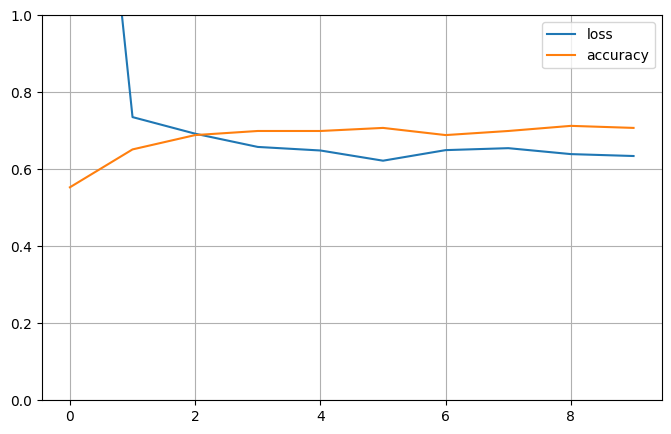

In [19]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [26]:
y_pred = model.predict(x_test) # Store predicted labels

2/2 [==============================] - 9s 2s/step


In [29]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred_classes)

# Print the classification report
print(classification_rep)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.09      0.17        11
           2       0.74      1.00      0.85        35

    accuracy                           0.75        48
   macro avg       0.58      0.36      0.34        48
weighted avg       0.77      0.75      0.66        48



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.75
